In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import time

In [21]:
L = 256
dx = 0.1
dt = 0.3
tspan = 300
nloops = int(tspan/dt)

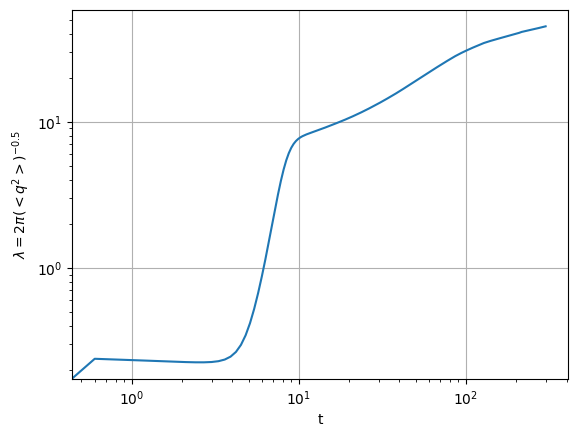

In [22]:
f = open("../fileQ2.dat", "r")
N = int(L/dx)
tt = np.zeros(nloops)
q2 = np.zeros(nloops)
lam = np.zeros(nloops)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        tt[i] = float(a)
        q2[i] = -float(b)
        lam[i] = 2*np.pi/np.sqrt(q2[i])

    i = i + 1

tt = tt[0:i-1]
q2 = q2[0:i-1]
lam = lam[0:i-1]

plt.loglog(tt, lam)
plt.xlabel("t")
plt.ylabel("$\lambda = 2\pi (<q^2>)^{-0.5}$")
plt.grid()

Text(0, 0.5, '$\\int |\\Delta u|^2 dx$')

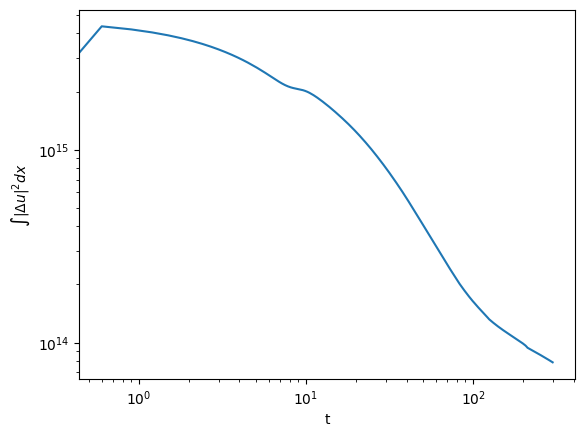

In [23]:
f = open("../fileGrad2.dat", "r")
tt = np.zeros(nloops)
grad2 = np.zeros(nloops)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        tt[i] = float(a)
        grad2[i] = float(b)

    i = i + 1

tt = tt[0:i-1]
grad2 = grad2[0:i-1]

plt.loglog(tt, grad2)
plt.xlabel("t")
plt.ylabel("$\int |\Delta u|^2 dx$")